## Pima indians diabetes data


In [1]:
import sys 
print(sys.version) # Python version

3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
import keras
print(keras.__version__)

2.4.3


In [27]:
# Keras and library load

from keras.models import Sequential 
from keras.layers import Dense

import numpy as np
import tensorflow as tf 
import pandas as pd 

In [34]:
# Set seed 
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed) 

In [35]:
# Load Data
df = pd.read_csv("pima-indians-diabetes.csv",names=["pregnant","plasma","pressure","thickness","insulin","BMI","pedigree","age","class"])
df2 = np.loadtxt("pima-indians-diabetes.csv",delimiter=",")
# Jupyter notebook - C:\Users\ folder 
X = df2[:,0:8]
Y = df2[:,8]

In [9]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
# When you want to see partial columns
df[['pregnant','class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


## Data processing

In [15]:
# If you want to check correlation with pregnant and diabetes,
# use groupby() function to make new group based on pregnant feature
print(df[['pregnant','class']].groupby(['pregnant'],
                                       as_index=False).mean().sort_values(by='pregnant',ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


## Visualize

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
# Set graph's size 
plt.figure(figsize = (12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


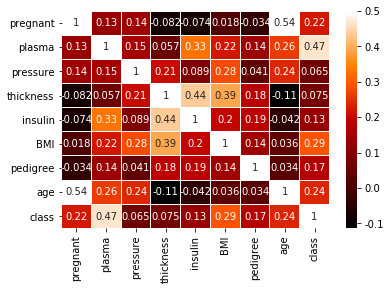

In [18]:
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=plt.cm.gist_heat,linecolor='white',annot=True)

- You should focus on the __class__ that indicates whether diabetes occured or not
- and you can check that plasma is the most correlated

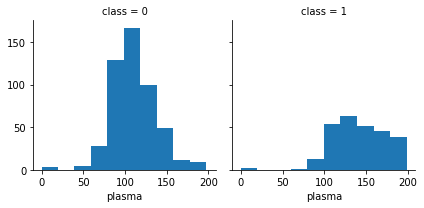

In [19]:
grid = sns.FacetGrid(df,col='class')
grid.map(plt.hist,'plasma',bins=10)
plt.show()

- In case of class = 1 (Diabetes occured), you can see that the plsama values are often over 150

## Use Keras to predict diabetes 

In [36]:
# 딥러닝 구조 설정 
model = Sequential() # layer를 선형으로 층층이 쌓는 Sequential 모듈 
# model.add() 함수를 통해 필요한 층을 쌓아나가는 것 
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X, Y, epochs=200, batch_size = 10)


Epoch 1/200
77/77 [==============================] - 0s 971us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 557us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 531us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 518us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 518us/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 518us/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 505us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 505us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 505us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 518us/step - loss: 0.6656 - accur

77/77 [==============================] - 0s 531us/step - loss: 0.5121 - accuracy: 0.7422
Epoch 82/200
77/77 [==============================] - 0s 557us/step - loss: 0.5087 - accuracy: 0.7461
Epoch 83/200
77/77 [==============================] - 0s 531us/step - loss: 0.5171 - accuracy: 0.7344
Epoch 84/200
77/77 [==============================] - 0s 544us/step - loss: 0.5120 - accuracy: 0.7305
Epoch 85/200
77/77 [==============================] - 0s 544us/step - loss: 0.5088 - accuracy: 0.7461
Epoch 86/200
77/77 [==============================] - 0s 544us/step - loss: 0.5046 - accuracy: 0.7513
Epoch 87/200
77/77 [==============================] - 0s 518us/step - loss: 0.5061 - accuracy: 0.7500
Epoch 88/200
77/77 [==============================] - 0s 518us/step - loss: 0.5073 - accuracy: 0.7500
Epoch 89/200
77/77 [==============================] - 0s 518us/step - loss: 0.5080 - accuracy: 0.7474
Epoch 90/200
77/77 [==============================] - 0s 505us/step - loss: 0.5111 - accuracy: 

77/77 [==============================] - 0s 518us/step - loss: 0.4852 - accuracy: 0.7513
Epoch 161/200
77/77 [==============================] - 0s 518us/step - loss: 0.4800 - accuracy: 0.7630
Epoch 162/200
77/77 [==============================] - 0s 507us/step - loss: 0.4807 - accuracy: 0.7565
Epoch 163/200
77/77 [==============================] - 0s 518us/step - loss: 0.4775 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 511us/step - loss: 0.4781 - accuracy: 0.7643
Epoch 165/200
77/77 [==============================] - 0s 544us/step - loss: 0.4844 - accuracy: 0.7526
Epoch 166/200
77/77 [==============================] - 0s 538us/step - loss: 0.4726 - accuracy: 0.7734
Epoch 167/200
77/77 [==============================] - 0s 622us/step - loss: 0.4676 - accuracy: 0.7695
Epoch 168/200
77/77 [==============================] - 0s 518us/step - loss: 0.4768 - accuracy: 0.7643
Epoch 169/200
77/77 [==============================] - 0s 518us/step - loss: 0.4706 - a

In [38]:
print("\n Accuracy : %.4f" % (model.evaluate(X, Y)[1]))
# 모델 정확도 = 85.32% = 100번 시행시 85번은 맞는다는 의미 


24/24 [==============================] - 0s 956us/step - loss: 0.4587 - accuracy: 0.7708

 Accuracy : 0.7708
